### Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_raw = pd.read_csv('raw_data.csv')

In [46]:
df_raw.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [47]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            396030 non-null  int64  
 1   loan_amnt             396030 non-null  float64
 2   term                  396030 non-null  object 
 3   int_rate              396030 non-null  float64
 4   installment           396030 non-null  float64
 5   grade                 396030 non-null  object 
 6   sub_grade             396030 non-null  object 
 7   emp_title             373103 non-null  object 
 8   emp_length            377729 non-null  object 
 9   home_ownership        396030 non-null  object 
 10  annual_inc            396030 non-null  float64
 11  verification_status   396030 non-null  object 
 12  issue_d               396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Preprocessing


In [48]:
df = df_raw.copy()

In [49]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

<Axes: xlabel='term', ylabel='count'>

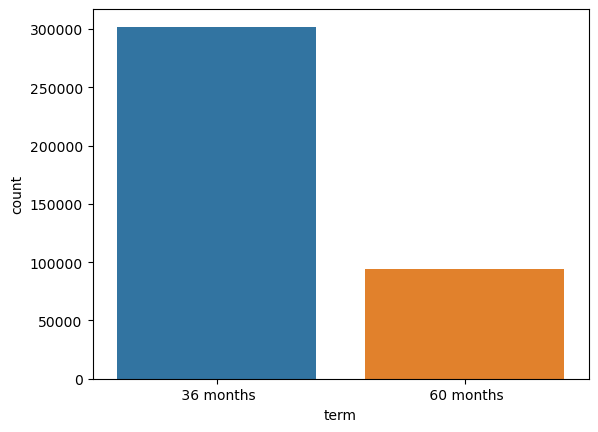

In [50]:
sns.countplot(x = 'term', data = df)

In [51]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [52]:
df['term'].dtype

dtype('int64')

In [53]:
df.drop('grade', axis = 1, inplace = True)

In [54]:
df['emp_title'].nunique()

173105

In [55]:
df.drop('emp_title', axis = 1, inplace = True)

In [56]:
df.isnull().sum() / len(df) * 100

Unnamed: 0              0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [57]:
df.corr(numeric_only = True)['mort_acc']

Unnamed: 0             -0.000322
loan_amnt               0.222315
term                    0.096220
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

<Axes: >

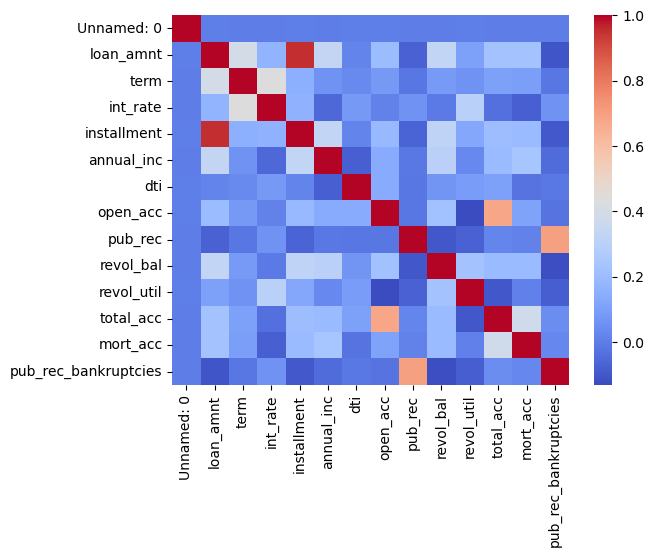

In [58]:
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm')

In [59]:
mean = df.groupby('total_acc')['mort_acc'].mean()

def mort_acc_fill(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mean[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: mort_acc_fill(x['total_acc'], x['mort_acc']), axis = 1)

In [60]:
df[['purpose', 'title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [61]:
df.drop('title', axis = 1, inplace = True)

In [62]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [63]:
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [64]:
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [65]:
df.drop('address', axis = 1, inplace = True)

In [66]:
df.drop('issue_d', axis = 1, inplace = True)

In [67]:
df.isnull().sum() / len(df) * 100

Unnamed: 0              0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
earliest_cr_year        0.000000
zip_code                0.000000
dtype: float64

In [68]:
df.dropna(inplace = True)

In [69]:
df.select_dtypes('object').columns

Index(['sub_grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

In [70]:
for col in df.select_dtypes('object').columns:
    print(f'{col}: {df[col].unique()} \n')

sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3'] 

emp_length: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year'] 

home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'] 

verification_status: ['Not Verified' 'Source Verified' 'Verified'] 

purpose: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy'] 

initial_list_status: ['w' 'f'] 

application_type: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY'] 



In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
for col in df.select_dtypes('object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col}: {df[col].unique()} \n')

sub_grade: [ 8  9  7  1 14 12  0  6 10  4 23  3  2 15 11  5 17 19 16 20 21 24 28 22
 18 30 29 31 13 25 27 34 33 26 32] 

emp_length: [ 1  4 10  6  9  2  3  8  7  5  0] 

home_ownership: [5 1 4 3 0 2] 

verification_status: [0 1 2] 

purpose: [12  2  1  4 11  6  9  7 13  0  8  5  3 10] 

initial_list_status: [1 0] 

application_type: [1 2 0] 



In [73]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [74]:
df.to_csv('data.csv', index = False)